In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: VTR
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


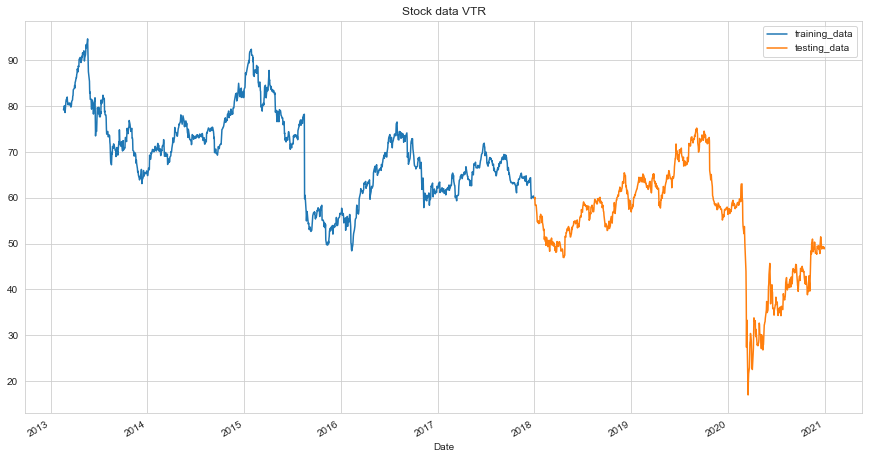

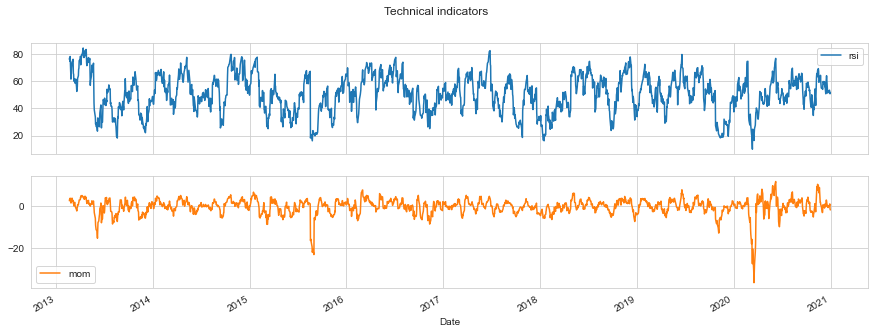

In [2]:
stock_name = 'vtr'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1054.67, duration: 0:00:00.438100
episode: 2/2000, episode end value: 987.45, duration: 0:00:00.411092
episode: 3/2000, episode end value: 1044.38, duration: 0:00:00.407092
episode: 4/2000, episode end value: 1021.08, duration: 0:00:00.304970
episode: 5/2000, episode end value: 1015.34, duration: 0:00:00.387536
episode: 6/2000, episode end value: 980.08, duration: 0:00:00.360328
episode: 7/2000, episode end value: 1016.55, duration: 0:00:00.339218
episode: 8/2000, episode end value: 969.93, duration: 0:00:00.316292
episode: 9/2000, episode end value: 928.18, duration: 0:00:00.297347
episode: 10/2000, episode end value: 1082.30, duration: 0:00:00.309722
episode: 11/2000, episode end value: 1097.56, duration: 0:00:00.306191
episode: 12/2000, episode end value: 1064.43, duration: 0:00:00.353080
episode: 13/2000, episode end value: 1093.83, duration: 0:00:00.306747
episode: 14/2000, episode end value: 992.39, duration: 0:00:00.335169
episode: 15/2000, ep

episode: 117/2000, episode end value: 1039.82, duration: 0:00:00.369103
episode: 118/2000, episode end value: 1044.69, duration: 0:00:00.398369
episode: 119/2000, episode end value: 1035.27, duration: 0:00:00.311636
episode: 120/2000, episode end value: 1047.54, duration: 0:00:00.321442
episode: 121/2000, episode end value: 1049.78, duration: 0:00:00.284528
episode: 122/2000, episode end value: 1041.55, duration: 0:00:00.351500
episode: 123/2000, episode end value: 1035.53, duration: 0:00:00.306471
episode: 124/2000, episode end value: 1039.56, duration: 0:00:00.481681
episode: 125/2000, episode end value: 1022.75, duration: 0:00:00.491797
episode: 126/2000, episode end value: 1040.46, duration: 0:00:00.388675
episode: 127/2000, episode end value: 1036.18, duration: 0:00:00.423381
episode: 128/2000, episode end value: 1026.62, duration: 0:00:00.338217
episode: 129/2000, episode end value: 1026.29, duration: 0:00:00.398068
episode: 130/2000, episode end value: 984.80, duration: 0:00:00.

episode: 232/2000, episode end value: 1066.88, duration: 0:00:00.361372
episode: 233/2000, episode end value: 1004.35, duration: 0:00:00.386606
episode: 234/2000, episode end value: 976.52, duration: 0:00:00.398997
episode: 235/2000, episode end value: 1006.11, duration: 0:00:00.419712
episode: 236/2000, episode end value: 984.38, duration: 0:00:00.416275
episode: 237/2000, episode end value: 1035.05, duration: 0:00:00.378578
episode: 238/2000, episode end value: 1077.46, duration: 0:00:00.424620
episode: 239/2000, episode end value: 1032.19, duration: 0:00:00.390355
episode: 240/2000, episode end value: 1039.73, duration: 0:00:00.427978
episode: 241/2000, episode end value: 1049.58, duration: 0:00:00.319162
episode: 242/2000, episode end value: 1000.40, duration: 0:00:00.328720
episode: 243/2000, episode end value: 1033.81, duration: 0:00:00.430877
episode: 244/2000, episode end value: 1010.47, duration: 0:00:00.390697
episode: 245/2000, episode end value: 1087.23, duration: 0:00:00.3

episode: 347/2000, episode end value: 1025.37, duration: 0:00:00.436338
episode: 348/2000, episode end value: 985.81, duration: 0:00:00.338937
episode: 349/2000, episode end value: 1040.11, duration: 0:00:00.383370
episode: 350/2000, episode end value: 1073.82, duration: 0:00:00.413511
episode: 351/2000, episode end value: 997.45, duration: 0:00:00.523125
episode: 352/2000, episode end value: 999.19, duration: 0:00:00.400459
episode: 353/2000, episode end value: 1110.00, duration: 0:00:00.516487
episode: 354/2000, episode end value: 1020.55, duration: 0:00:00.389249
episode: 355/2000, episode end value: 1012.72, duration: 0:00:00.410026
episode: 356/2000, episode end value: 1026.49, duration: 0:00:00.406881
episode: 357/2000, episode end value: 1023.52, duration: 0:00:00.457296
episode: 358/2000, episode end value: 997.31, duration: 0:00:00.390104
episode: 359/2000, episode end value: 1017.05, duration: 0:00:00.415845
episode: 360/2000, episode end value: 1021.19, duration: 0:00:00.446

episode: 462/2000, episode end value: 1052.49, duration: 0:00:00.333194
episode: 463/2000, episode end value: 1057.46, duration: 0:00:00.299765
episode: 464/2000, episode end value: 1032.25, duration: 0:00:00.369025
episode: 465/2000, episode end value: 1007.17, duration: 0:00:00.346757
episode: 466/2000, episode end value: 1034.57, duration: 0:00:00.468091
episode: 467/2000, episode end value: 1001.16, duration: 0:00:00.408991
episode: 468/2000, episode end value: 1108.61, duration: 0:00:00.319264
episode: 469/2000, episode end value: 1036.49, duration: 0:00:00.415323
episode: 470/2000, episode end value: 994.69, duration: 0:00:00.460571
episode: 471/2000, episode end value: 1007.61, duration: 0:00:00.446857
episode: 472/2000, episode end value: 1039.16, duration: 0:00:00.423956
episode: 473/2000, episode end value: 994.08, duration: 0:00:00.396856
episode: 474/2000, episode end value: 990.93, duration: 0:00:00.402028
episode: 475/2000, episode end value: 1001.87, duration: 0:00:00.40

episode: 577/2000, episode end value: 1006.01, duration: 0:00:00.465559
episode: 578/2000, episode end value: 1086.28, duration: 0:00:00.349961
episode: 579/2000, episode end value: 990.78, duration: 0:00:00.523649
episode: 580/2000, episode end value: 1075.07, duration: 0:00:00.398261
episode: 581/2000, episode end value: 998.50, duration: 0:00:00.373020
episode: 582/2000, episode end value: 1036.61, duration: 0:00:00.512072
episode: 583/2000, episode end value: 987.15, duration: 0:00:00.463279
episode: 584/2000, episode end value: 1012.89, duration: 0:00:00.435813
episode: 585/2000, episode end value: 1153.06, duration: 0:00:00.336916
episode: 586/2000, episode end value: 1086.34, duration: 0:00:00.356128
episode: 587/2000, episode end value: 1075.37, duration: 0:00:00.461332
episode: 588/2000, episode end value: 972.25, duration: 0:00:00.426675
episode: 589/2000, episode end value: 997.36, duration: 0:00:00.441247
episode: 590/2000, episode end value: 1032.51, duration: 0:00:00.4182

episode: 692/2000, episode end value: 992.41, duration: 0:00:00.440022
episode: 693/2000, episode end value: 990.61, duration: 0:00:00.402801
episode: 694/2000, episode end value: 996.90, duration: 0:00:00.467510
episode: 695/2000, episode end value: 1087.31, duration: 0:00:00.422234
episode: 696/2000, episode end value: 1003.81, duration: 0:00:00.410491
episode: 697/2000, episode end value: 990.81, duration: 0:00:00.413968
episode: 698/2000, episode end value: 1047.71, duration: 0:00:00.384435
episode: 699/2000, episode end value: 1016.75, duration: 0:00:00.377584
episode: 700/2000, episode end value: 1042.99, duration: 0:00:00.385855
episode: 701/2000, episode end value: 1139.13, duration: 0:00:00.416276
episode: 702/2000, episode end value: 1048.89, duration: 0:00:00.471016
episode: 703/2000, episode end value: 1005.99, duration: 0:00:00.506252
episode: 704/2000, episode end value: 1082.92, duration: 0:00:00.409902
episode: 705/2000, episode end value: 1058.86, duration: 0:00:00.372

episode: 806/2000, episode end value: 1025.44, duration: 0:00:00.448171
episode: 807/2000, episode end value: 994.15, duration: 0:00:00.400252
episode: 808/2000, episode end value: 1055.76, duration: 0:00:00.381488
episode: 809/2000, episode end value: 1013.05, duration: 0:00:00.387678
episode: 810/2000, episode end value: 1055.74, duration: 0:00:00.392915
episode: 811/2000, episode end value: 1075.88, duration: 0:00:00.446868
episode: 812/2000, episode end value: 970.05, duration: 0:00:00.421014
episode: 813/2000, episode end value: 1021.42, duration: 0:00:00.399169
episode: 814/2000, episode end value: 1031.13, duration: 0:00:00.374083
episode: 815/2000, episode end value: 1048.60, duration: 0:00:00.524891
episode: 816/2000, episode end value: 1061.24, duration: 0:00:00.382440
episode: 817/2000, episode end value: 1004.74, duration: 0:00:00.362613
episode: 818/2000, episode end value: 1053.91, duration: 0:00:00.416882
episode: 819/2000, episode end value: 1043.04, duration: 0:00:00.3

episode: 921/2000, episode end value: 986.45, duration: 0:00:00.362136
episode: 922/2000, episode end value: 1000.83, duration: 0:00:00.328341
episode: 923/2000, episode end value: 1010.22, duration: 0:00:00.316896
episode: 924/2000, episode end value: 1017.83, duration: 0:00:00.315813
episode: 925/2000, episode end value: 1010.48, duration: 0:00:00.359056
episode: 926/2000, episode end value: 980.21, duration: 0:00:00.343742
episode: 927/2000, episode end value: 1003.25, duration: 0:00:00.313718
episode: 928/2000, episode end value: 1020.25, duration: 0:00:00.413802
episode: 929/2000, episode end value: 1015.24, duration: 0:00:00.350017
episode: 930/2000, episode end value: 996.64, duration: 0:00:00.331315
episode: 931/2000, episode end value: 1023.61, duration: 0:00:00.295774
episode: 932/2000, episode end value: 1033.54, duration: 0:00:00.349965
episode: 933/2000, episode end value: 1033.14, duration: 0:00:00.326587
episode: 934/2000, episode end value: 992.89, duration: 0:00:00.350

episode: 1035/2000, episode end value: 1046.57, duration: 0:00:00.405588
episode: 1036/2000, episode end value: 1118.71, duration: 0:00:00.384515
episode: 1037/2000, episode end value: 1024.40, duration: 0:00:00.404911
episode: 1038/2000, episode end value: 1047.74, duration: 0:00:00.396044
episode: 1039/2000, episode end value: 1042.89, duration: 0:00:00.397629
episode: 1040/2000, episode end value: 1054.53, duration: 0:00:00.393023
episode: 1041/2000, episode end value: 1069.46, duration: 0:00:00.415333
episode: 1042/2000, episode end value: 1083.03, duration: 0:00:00.405780
episode: 1043/2000, episode end value: 1045.09, duration: 0:00:00.416283
episode: 1044/2000, episode end value: 1068.70, duration: 0:00:00.356453
episode: 1045/2000, episode end value: 1088.86, duration: 0:00:00.429320
episode: 1046/2000, episode end value: 1016.67, duration: 0:00:00.423823
episode: 1047/2000, episode end value: 1128.67, duration: 0:00:00.401525
episode: 1048/2000, episode end value: 1132.95, dur

episode: 1148/2000, episode end value: 1068.06, duration: 0:00:00.352875
episode: 1149/2000, episode end value: 1008.78, duration: 0:00:00.357702
episode: 1150/2000, episode end value: 1049.32, duration: 0:00:00.405693
episode: 1151/2000, episode end value: 986.22, duration: 0:00:00.337248
episode: 1152/2000, episode end value: 1001.68, duration: 0:00:00.377346
episode: 1153/2000, episode end value: 1057.84, duration: 0:00:00.399106
episode: 1154/2000, episode end value: 997.50, duration: 0:00:00.489490
episode: 1155/2000, episode end value: 1144.38, duration: 0:00:00.422043
episode: 1156/2000, episode end value: 998.31, duration: 0:00:00.420975
episode: 1157/2000, episode end value: 1002.90, duration: 0:00:00.392388
episode: 1158/2000, episode end value: 1032.41, duration: 0:00:00.451895
episode: 1159/2000, episode end value: 1021.82, duration: 0:00:00.413241
episode: 1160/2000, episode end value: 1035.62, duration: 0:00:00.456466
episode: 1161/2000, episode end value: 991.68, duratio

episode: 1261/2000, episode end value: 1013.84, duration: 0:00:00.470838
episode: 1262/2000, episode end value: 1001.64, duration: 0:00:00.535236
episode: 1263/2000, episode end value: 996.34, duration: 0:00:00.444293
episode: 1264/2000, episode end value: 1074.65, duration: 0:00:00.394076
episode: 1265/2000, episode end value: 1024.98, duration: 0:00:00.458618
episode: 1266/2000, episode end value: 1061.21, duration: 0:00:00.357381
episode: 1267/2000, episode end value: 990.11, duration: 0:00:00.383996
episode: 1268/2000, episode end value: 1136.71, duration: 0:00:00.376904
episode: 1269/2000, episode end value: 1081.36, duration: 0:00:00.395730
episode: 1270/2000, episode end value: 1050.45, duration: 0:00:00.432251
episode: 1271/2000, episode end value: 1115.53, duration: 0:00:00.452937
episode: 1272/2000, episode end value: 994.98, duration: 0:00:00.484193
episode: 1273/2000, episode end value: 1008.65, duration: 0:00:00.379389
episode: 1274/2000, episode end value: 1037.51, durati

episode: 1374/2000, episode end value: 987.89, duration: 0:00:00.450156
episode: 1375/2000, episode end value: 1058.41, duration: 0:00:00.371212
episode: 1376/2000, episode end value: 1029.44, duration: 0:00:00.375993
episode: 1377/2000, episode end value: 997.01, duration: 0:00:00.433778
episode: 1378/2000, episode end value: 1011.29, duration: 0:00:00.401898
episode: 1379/2000, episode end value: 1009.99, duration: 0:00:00.337012
episode: 1380/2000, episode end value: 1026.23, duration: 0:00:00.422284
episode: 1381/2000, episode end value: 1073.15, duration: 0:00:00.387389
episode: 1382/2000, episode end value: 1071.40, duration: 0:00:00.376827
episode: 1383/2000, episode end value: 1015.71, duration: 0:00:00.357193
episode: 1384/2000, episode end value: 1011.00, duration: 0:00:00.443089
episode: 1385/2000, episode end value: 992.63, duration: 0:00:00.371673
episode: 1386/2000, episode end value: 1042.57, duration: 0:00:00.374946
episode: 1387/2000, episode end value: 1007.74, durati

episode: 1487/2000, episode end value: 1079.00, duration: 0:00:00.337750
episode: 1488/2000, episode end value: 1023.03, duration: 0:00:00.368825
episode: 1489/2000, episode end value: 1048.69, duration: 0:00:00.370200
episode: 1490/2000, episode end value: 1023.42, duration: 0:00:00.376724
episode: 1491/2000, episode end value: 1025.18, duration: 0:00:00.370971
episode: 1492/2000, episode end value: 1021.07, duration: 0:00:00.391250
episode: 1493/2000, episode end value: 999.82, duration: 0:00:00.483305
episode: 1494/2000, episode end value: 1089.02, duration: 0:00:00.325893
episode: 1495/2000, episode end value: 1056.27, duration: 0:00:00.420733
episode: 1496/2000, episode end value: 983.40, duration: 0:00:00.341801
episode: 1497/2000, episode end value: 1033.67, duration: 0:00:00.462863
episode: 1498/2000, episode end value: 1057.86, duration: 0:00:00.399222
episode: 1499/2000, episode end value: 1036.84, duration: 0:00:00.383771
episode: 1500/2000, episode end value: 998.28, durati

episode: 1600/2000, episode end value: 999.29, duration: 0:00:00.326753
episode: 1601/2000, episode end value: 1084.90, duration: 0:00:00.308043
episode: 1602/2000, episode end value: 1013.23, duration: 0:00:00.343464
episode: 1603/2000, episode end value: 1001.79, duration: 0:00:00.340412
episode: 1604/2000, episode end value: 1000.88, duration: 0:00:00.299316
episode: 1605/2000, episode end value: 1033.30, duration: 0:00:00.374971
episode: 1606/2000, episode end value: 1095.26, duration: 0:00:00.304081
episode: 1607/2000, episode end value: 1002.47, duration: 0:00:00.349387
episode: 1608/2000, episode end value: 1035.20, duration: 0:00:00.329213
episode: 1609/2000, episode end value: 1118.61, duration: 0:00:00.322453
episode: 1610/2000, episode end value: 1090.31, duration: 0:00:00.322146
episode: 1611/2000, episode end value: 1008.13, duration: 0:00:00.359469
episode: 1612/2000, episode end value: 1037.49, duration: 0:00:00.305869
episode: 1613/2000, episode end value: 978.57, durat

episode: 1713/2000, episode end value: 1030.35, duration: 0:00:00.318616
episode: 1714/2000, episode end value: 1003.11, duration: 0:00:00.302240
episode: 1715/2000, episode end value: 1132.76, duration: 0:00:00.299719
episode: 1716/2000, episode end value: 1010.90, duration: 0:00:00.302680
episode: 1717/2000, episode end value: 1057.17, duration: 0:00:00.277005
episode: 1718/2000, episode end value: 1087.39, duration: 0:00:00.253447
episode: 1719/2000, episode end value: 1105.40, duration: 0:00:00.284507
episode: 1720/2000, episode end value: 1000.81, duration: 0:00:00.269552
episode: 1721/2000, episode end value: 1052.11, duration: 0:00:00.303360
episode: 1722/2000, episode end value: 1039.51, duration: 0:00:00.290490
episode: 1723/2000, episode end value: 989.01, duration: 0:00:00.284583
episode: 1724/2000, episode end value: 1063.18, duration: 0:00:00.296009
episode: 1725/2000, episode end value: 1036.69, duration: 0:00:00.285705
episode: 1726/2000, episode end value: 1024.32, dura

episode: 1826/2000, episode end value: 989.81, duration: 0:00:00.241410
episode: 1827/2000, episode end value: 1019.22, duration: 0:00:00.224697
episode: 1828/2000, episode end value: 1025.33, duration: 0:00:00.259694
episode: 1829/2000, episode end value: 1017.89, duration: 0:00:00.214414
episode: 1830/2000, episode end value: 1026.10, duration: 0:00:00.266967
episode: 1831/2000, episode end value: 1025.77, duration: 0:00:00.260852
episode: 1832/2000, episode end value: 995.39, duration: 0:00:00.290441
episode: 1833/2000, episode end value: 1073.08, duration: 0:00:00.240425
episode: 1834/2000, episode end value: 1025.59, duration: 0:00:00.285378
episode: 1835/2000, episode end value: 1036.68, duration: 0:00:00.241110
episode: 1836/2000, episode end value: 1100.19, duration: 0:00:00.244701
episode: 1837/2000, episode end value: 1045.32, duration: 0:00:00.242695
episode: 1838/2000, episode end value: 1083.08, duration: 0:00:00.217794
episode: 1839/2000, episode end value: 991.26, durati

episode: 1939/2000, episode end value: 1001.04, duration: 0:00:00.224961
episode: 1940/2000, episode end value: 1004.94, duration: 0:00:00.219460
episode: 1941/2000, episode end value: 1007.93, duration: 0:00:00.219446
episode: 1942/2000, episode end value: 994.17, duration: 0:00:00.237183
episode: 1943/2000, episode end value: 978.83, duration: 0:00:00.214494
episode: 1944/2000, episode end value: 1020.85, duration: 0:00:00.239531
episode: 1945/2000, episode end value: 1066.35, duration: 0:00:00.256140
episode: 1946/2000, episode end value: 1041.04, duration: 0:00:00.245209
episode: 1947/2000, episode end value: 1024.05, duration: 0:00:00.243141
episode: 1948/2000, episode end value: 1159.23, duration: 0:00:00.234286
episode: 1949/2000, episode end value: 1057.36, duration: 0:00:00.237466
episode: 1950/2000, episode end value: 1148.60, duration: 0:00:00.254063
episode: 1951/2000, episode end value: 1027.95, duration: 0:00:00.244501
episode: 1952/2000, episode end value: 1076.61, durat

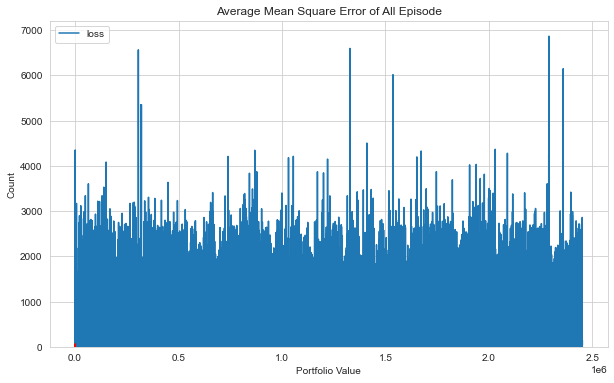

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

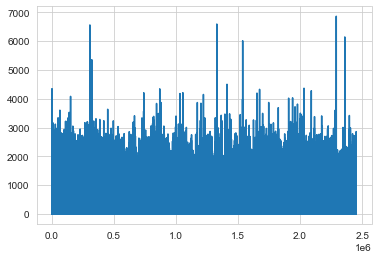

In [5]:
plt.plot(agent.model.losses)

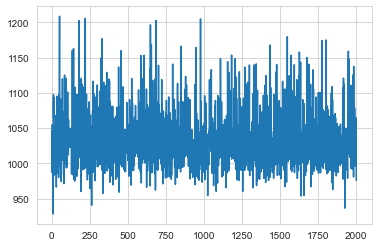

In [6]:
plt.plot(portfolio_value)

episode end value: 1184.06, duration: 0:00:00.095240
Sell: 367 times, Buy: 322 times


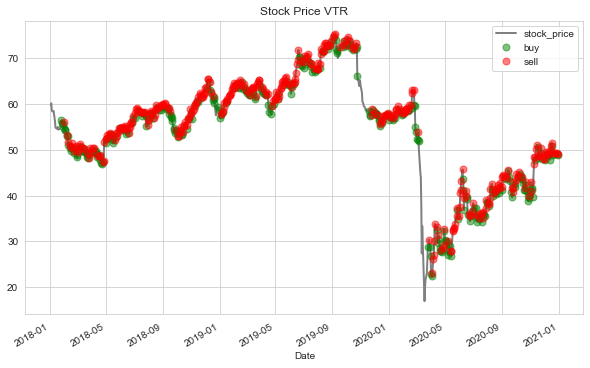

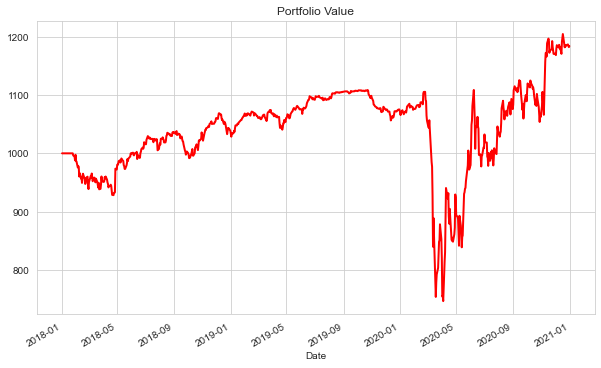

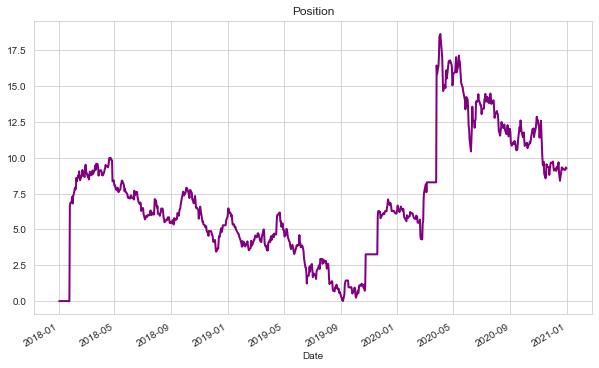

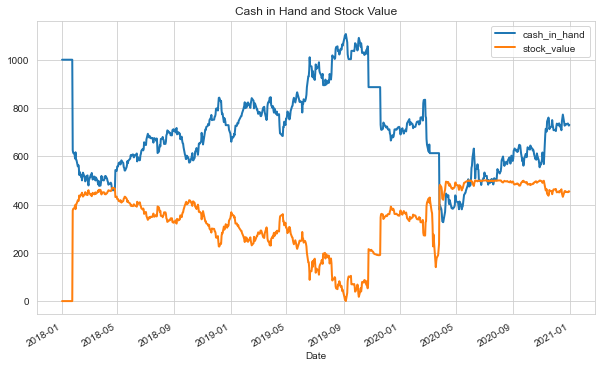

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: VTR
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 5.79 %
Volatility: 0.2096
shape ratio: 0.2239
Maximun drawdown: -32.68 %
Calmar ratio: 0.1773
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -6.38 %
Volatility (benchmark): 0.5209
shape ratio: -0.1435
Maximun drawdown: -77.44 %
Calmar ratio (benchmark): -0.0824


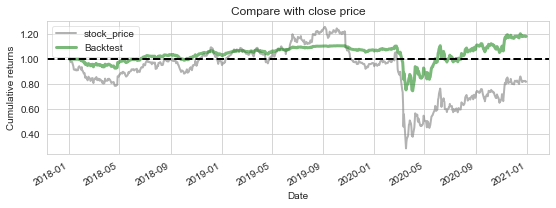

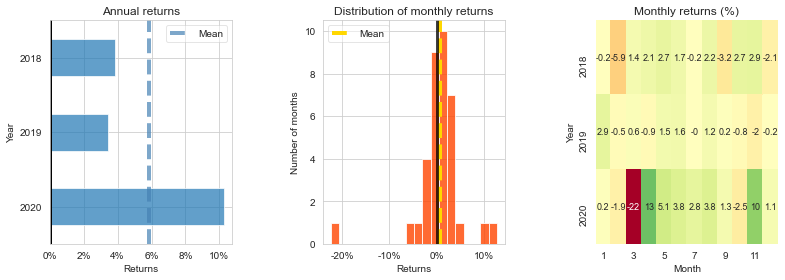

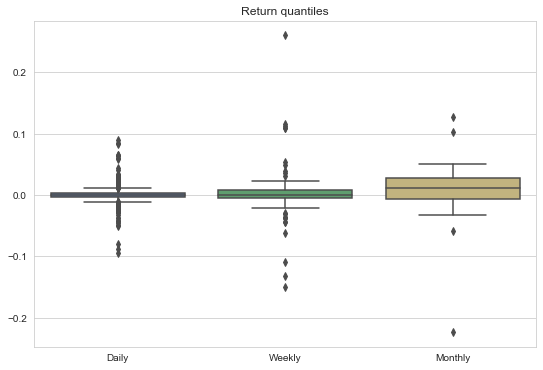

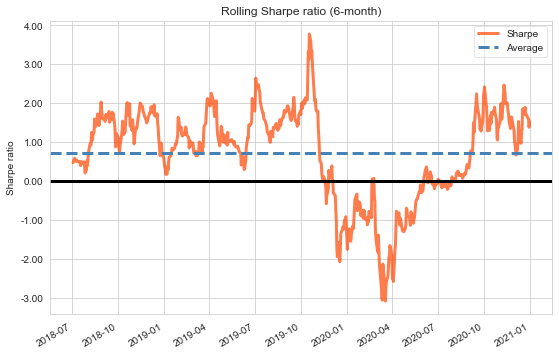

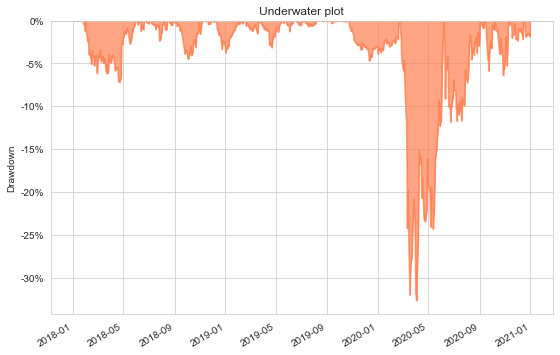

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')